In [1]:
import numpy as np
np.random.seed(2022)
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture as GMM

In [2]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

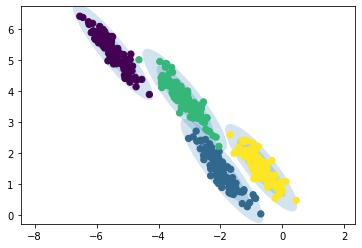

In [3]:

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] 
rng = np.random.RandomState(13)
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GMM(n_components=4, random_state=2022, max_iter=100, warm_start=True)
plot_gmm(gmm, X_stretched)
probs = gmm.predict_proba(X_stretched)

# print(probs[:5])
# print('component means:',gmm.means_)
# print('component covariances:',gmm.covariances_)